<a href="https://colab.research.google.com/github/prakash-tech89/Data-Science/blob/master/Python/Hackathon/Credit_card_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Generic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
train_df=pd.read_csv("/content/CreditScore_train.csv")
test_df=pd.read_csv("/content/CreditScore_test.csv")

In [3]:
print("Train size : rows",train_df.shape[0]," and columns",train_df.shape[1])
print("Test size : rows",test_df.shape[0]," and columns",test_df.shape[1])
#print("Submission size : rows",submission_df.shape[0]," and columns",submission_df.shape[1])

Train size : rows 80000  and columns 305
Test size : rows 20000  and columns 305


In [0]:
train_df["source"] = "train"
test_df["source"] = "test"
df = pd.concat([train_df,test_df])

In [5]:
df.duplicated().sum()


0

In [6]:
df.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
x006          0
x007          0
x008          0
x009          0
x010          0
x011          0
x012          0
x013          0
x014          0
x015          0
x016          0
x017          0
x018          0
x019          0
x020          0
x021          0
x022          0
x023          0
x024          0
x025          0
x026          0
x027          0
x028          0
x029          0
x030          0
          ...  
x277          0
x278          0
x279          0
x280          0
x281          0
x282          0
x283          0
x284          0
x285          0
x286          0
x287      24821
x288      49756
x289      49756
x290      49756
x291          0
x292          0
x293      51133
x294          0
x295      86533
x296          0
x297      58112
x298          0
x299          0
x300          0
x301          0
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int6

In [0]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [8]:
missing_value_df.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
x242,x242,93.339
x295,x295,86.533
x304,x304,81.875
x098,x098,80.681
x155,x155,79.051
x259,x259,77.432
x257,x257,76.913
x256,x256,76.913
x255,x255,76.913
x302,x302,73.069


In [0]:
df.dropna(thresh=df.shape[0]*0.5,how='all',axis=1,inplace=True)

In [10]:
df.shape

(100000, 287)

In [11]:
# Identify discrete and continous columns
col_disc=[]
col_medium=[]
col_cont=[]
print("Attributes with their distinct count and their classification")
for i in df.columns:
    if df[i].nunique() <=10:
        print(i,"==",df[i].nunique(),"== disc")
        col_disc.append(i)
    elif (df[i].nunique() >10 and df[i].nunique() <100):
        col_medium.append(i)    
        print(i,"==",df[i].nunique(),"== medium")
    else:
        col_cont.append(i)
        print(i,"==",df[i].nunique(),"== cont")

Attributes with their distinct count and their classification
x001 == 100000 == cont
x002 == 666 == cont
x003 == 457 == cont
x004 == 492 == cont
x005 == 699 == cont
x006 == 2 == disc
x007 == 32 == medium
x008 == 44 == medium
x009 == 42 == medium
x010 == 30 == medium
x011 == 41 == medium
x012 == 38 == medium
x013 == 39 == medium
x014 == 60 == medium
x015 == 125 == cont
x016 == 58 == medium
x017 == 110 == cont
x018 == 17 == medium
x019 == 12 == medium
x020 == 95 == medium
x021 == 49 == medium
x022 == 7 == disc
x023 == 6 == disc
x024 == 106 == cont
x025 == 2 == disc
x026 == 2 == disc
x027 == 2 == disc
x028 == 30 == medium
x029 == 30 == medium
x030 == 69 == medium
x031 == 122 == cont
x032 == 27 == medium
x033 == 41 == medium
x034 == 59 == medium
x035 == 84 == medium
x036 == 41 == medium
x037 == 5 == disc
x038 == 12 == medium
x039 == 18 == medium
x040 == 28 == medium
x041 == 12056 == cont
x042 == 8728 == cont
x043 == 28977 == cont
x044 == 4384 == cont
x045 == 1262 == cont
x046 == 19 == medi

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
x290,x290,49.756
x289,x289,49.756
x288,x288,49.756
x148,x148,41.785
x223,x223,37.069
x222,x222,36.987
x058,x058,36.872
x057,x057,36.872
x041,x041,36.872
x238,x238,36.744


In [13]:
col_na_lst=missing_value_df.loc[missing_value_df["percent_missing"] >0,"column_name"].values
col_na_lst

array(['x002', 'x003', 'x004', 'x005', 'x041', 'x044', 'x045', 'x057',
       'x058', 'x148', 'x222', 'x223', 'x234', 'x235', 'x237', 'x238',
       'x239', 'x272', 'x287', 'x288', 'x289', 'x290'], dtype=object)

In [14]:
for i in col_na_lst:
    if i in col_disc:
        print(i,"Discrete")
        df[i].fillna((df[i].mode()[0]), inplace=True)
    else:
        print(i,"Continuous")
        df[i].fillna((df[i].median()), inplace=True)

x002 Continuous
x003 Continuous
x004 Continuous
x005 Continuous
x041 Continuous
x044 Continuous
x045 Continuous
x057 Continuous
x058 Continuous
x148 Discrete
x222 Continuous
x223 Continuous
x234 Continuous
x235 Continuous
x237 Continuous
x238 Continuous
x239 Continuous
x272 Continuous
x287 Discrete
x288 Continuous
x289 Continuous
x290 Continuous


In [15]:
df.columns[df.isna().any()].tolist()

[]

In [16]:
df.corr()['y'].sort_values(ascending=False)

y       1.000000
x235    0.614262
x005    0.572926
x236    0.572875
x022    0.568884
x227    0.537190
x249    0.515316
x226    0.514055
x228    0.512067
x046    0.507595
x244    0.503321
x225    0.488159
x025    0.487376
x023    0.480639
x237    0.475253
x014    0.474342
x239    0.473360
x002    0.468960
x245    0.467735
x246    0.459512
x250    0.447270
x247    0.446191
x262    0.445821
x229    0.443279
x261    0.439065
x260    0.434920
x224    0.432531
x030    0.425470
x027    0.424206
x004    0.418185
          ...   
x104   -0.263943
x187   -0.264343
x240   -0.264705
x193   -0.270021
x192   -0.279946
x031   -0.280099
x171   -0.283763
x073   -0.284965
x040   -0.291714
x062   -0.293974
x099   -0.307428
x276   -0.307428
x277   -0.308842
x172   -0.309105
x036   -0.312055
x278   -0.316596
x056   -0.336567
x173   -0.337363
x168   -0.348083
x063   -0.358450
x064   -0.411101
x065   -0.413885
x059   -0.415029
x287   -0.431688
x041   -0.475646
x057   -0.542142
x067         NaN
x094         N

In [17]:
train_series=df.cov()["y"]
#print((train_series))
low_cov=list(set(train_series[abs(train_series)>0.5].index))
#low_cov.append("y")
print(len(low_cov))
print(type(low_cov))
low_cov.count("y")

274
<class 'list'>


1

In [0]:
df_fs=df[low_cov]
train_labels = df_fs['y']
train=df_fs.drop(columns = ['y'])

In [19]:
!pip install feature_selector

In [0]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = train, labels = train_labels)

In [21]:
fs.identify_collinear(correlation_threshold=0.975)

25 features with a correlation magnitude greater than 0.97.



In [22]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['x270', 'x220', 'x145', 'x130', 'x141']

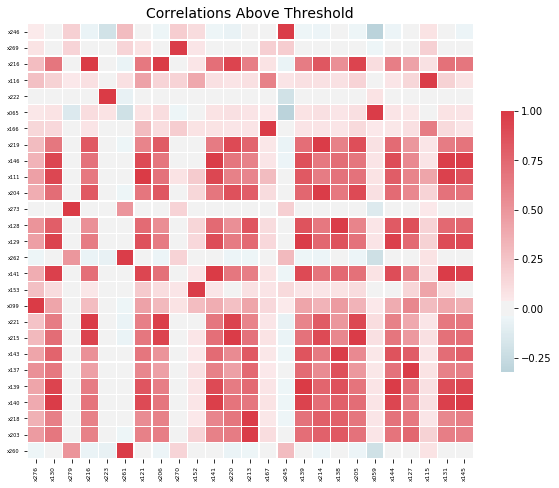

In [23]:

fs.plot_collinear()

21 features with a correlation magnitude greater than 0.98.



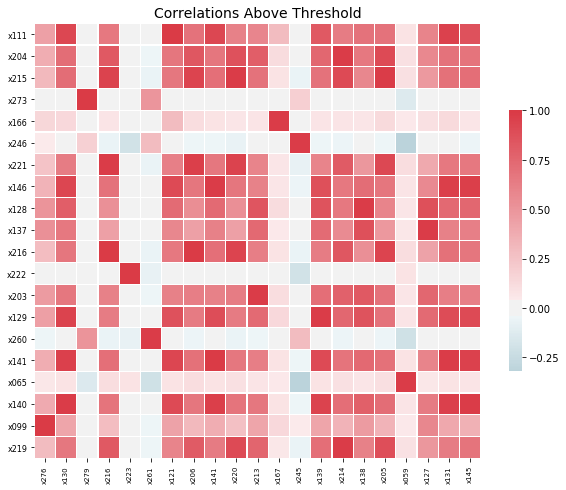

In [24]:

fs.identify_collinear(correlation_threshold=0.98)
fs.plot_collinear()

In [26]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 693.544
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 653.247
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 661.763
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 668.108
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 686.975
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 681.191
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's

In [27]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

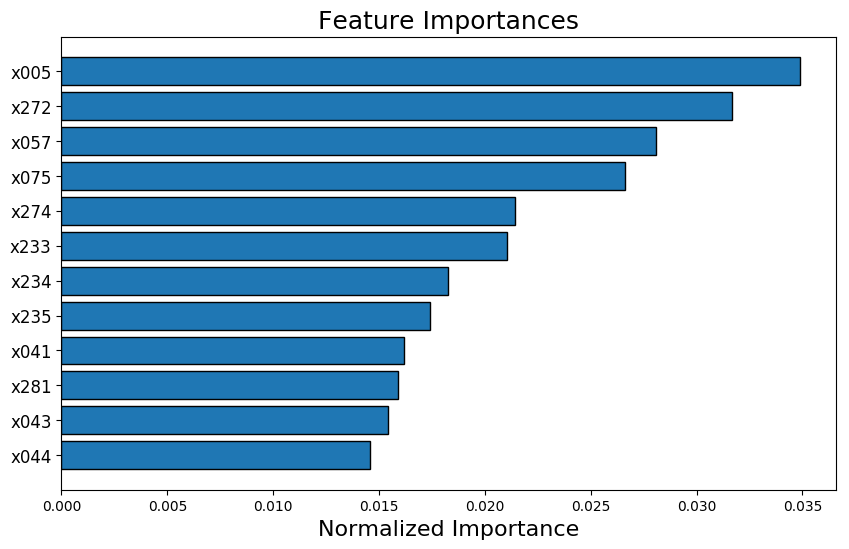

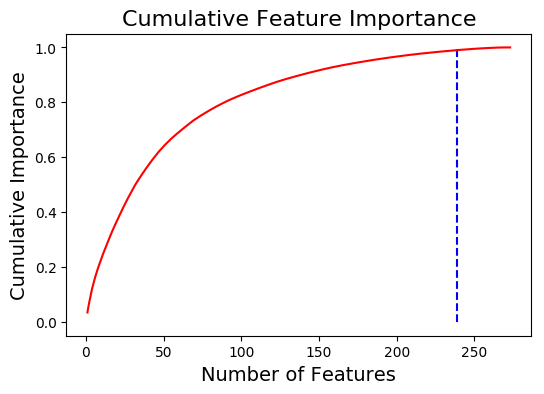

239 features required for 0.99 of cumulative importance


In [28]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [29]:
fs.identify_low_importance(cumulative_importance = 0.99)

238 features required for cumulative importance of 0.99 after one hot encoding.
35 features do not contribute to cumulative importance of 0.99.



In [30]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['x061', 'x143', 'x142', 'x136', 'x112']

In [31]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 53 features identified for removal


['x142',
 'x166',
 'x121',
 'x154',
 'x206',
 'x132',
 'x091',
 'x152',
 'x163',
 'x262',
 'x068',
 'x141',
 'x026',
 'x136',
 'x143']

In [32]:
train_removed = fs.remove(methods = 'all')
train_removed.shape

['collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 53 features.


(100000, 220)

In [33]:
train_removed.columns

Index(['x192', 'x284', 'x047', 'x251', 'x133', 'x114', 'x269', 'x225', 'x039',
       'x043',
       ...
       'x120', 'x184', 'x237', 'x180', 'x288', 'x181', 'x010', 'x042', 'x003',
       'x234'],
      dtype='object', length=220)

In [0]:
X = train_removed
Y = train_labels

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor


# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [0]:
def create_logistic():
    model = LinearRegression()
    return model

def create_NB():
    model = GaussianNB()
    return model

def creat_knn():
    model = KNeighborsRegressor()
    return model

def create_decision():
    model = DecisionTreeRegressor()
    return model

def create_random():
    model = RandomForestRegressor()
    return model

def create_ada():
    model = AdaBoostRegressor()
    return model

def create_gbm():
    model = GradientBoostingRegressor()
    return model

In [0]:
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [38]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', create_logistic()))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results: 83.07% (0.56%)


In [39]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', create_NB()))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results: 0.23% (0.03%)


In [41]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', create_decision()))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results: 86.89% (0.29%)


In [45]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', create_random()))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results: 93.45% (0.15%)


In [46]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', create_ada()))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results: 83.47% (0.48%)


In [47]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', create_gbm()))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results: 92.49% (0.18%)


In [0]:
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=220, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

In [57]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=create_baseline, epochs=30, batch_size=100, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: -11528385.87% (9210.41%)


In [148]:
# Evaluate model using standardized dataset. 
#estimators = []
#estimators.append(('standardize', StandardScaler()))
#estimators.append(('mlp', creat_knn()))
#pipeline = Pipeline(estimators)
#kfold = StratifiedKFold(n_splits=10, shuffle=True)
#results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
#print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: ignored